
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# Load PyALCS ACSM module
from bacs.agents.bacs import BACS, Configuration
from bacs.agents.bacs.utils.GymMazeWrapper import _maze_metrics, _does_pees_match_non_aliased_states, parse_metrics_to_df, plot_performance

# Load environments
import gym
import my_mazes

# Agent - BACS

## Common parameters

In [2]:
CLASSIFIER_LENGTH = 8
NUMBER_OF_POSSIBLE_ACTIONS = 8

MAZE = "MazeE2-v0"

NUMBER_OF_EXPLORE_TRIALS = 2000
METRICS_TRIAL_FREQUENCY_EXPLORE = 1
BETA_EXPLORE = 0.05
EPSILON = 0.8

DO_GA = True
ENABLE_PEE = True

## Environment - Maze

In [3]:
# Initialize environment
maze = gym.make(MAZE)
# Reset it, by putting an agent into random position
situation = maze.reset()
# Render the state in ASCII
maze.render('aliasing_human')


■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ ■ ■ ■ ■ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■
■ ■ ■ □ □ □ ■ ■ ■
■ ■ ■ □ $ □ ■ ■ ■
■ ■ ■ □ □ □ ■ ■ ■
■ ■ A ■ ■ ■ ■ ■ ■
■ □ ■ ■ ■ ■ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


## Training of BACS - Exploration

In [4]:
%%time

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pee=ENABLE_PEE,
    do_ga=DO_GA,
    beta=BETA_EXPLORE,
    gamma=0.95,
    theta_i=0.1,
    theta_r=0.9,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    theta_exp=20,
    theta_ga=100,
    theta_as=20,
    mu=0.3,
    chi=0.8,
    bs_max=0
)

agent_explore = BACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(maze, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 12min 29s, sys: 2.75 s, total: 12min 31s
Wall time: 12min 51s


### Performance

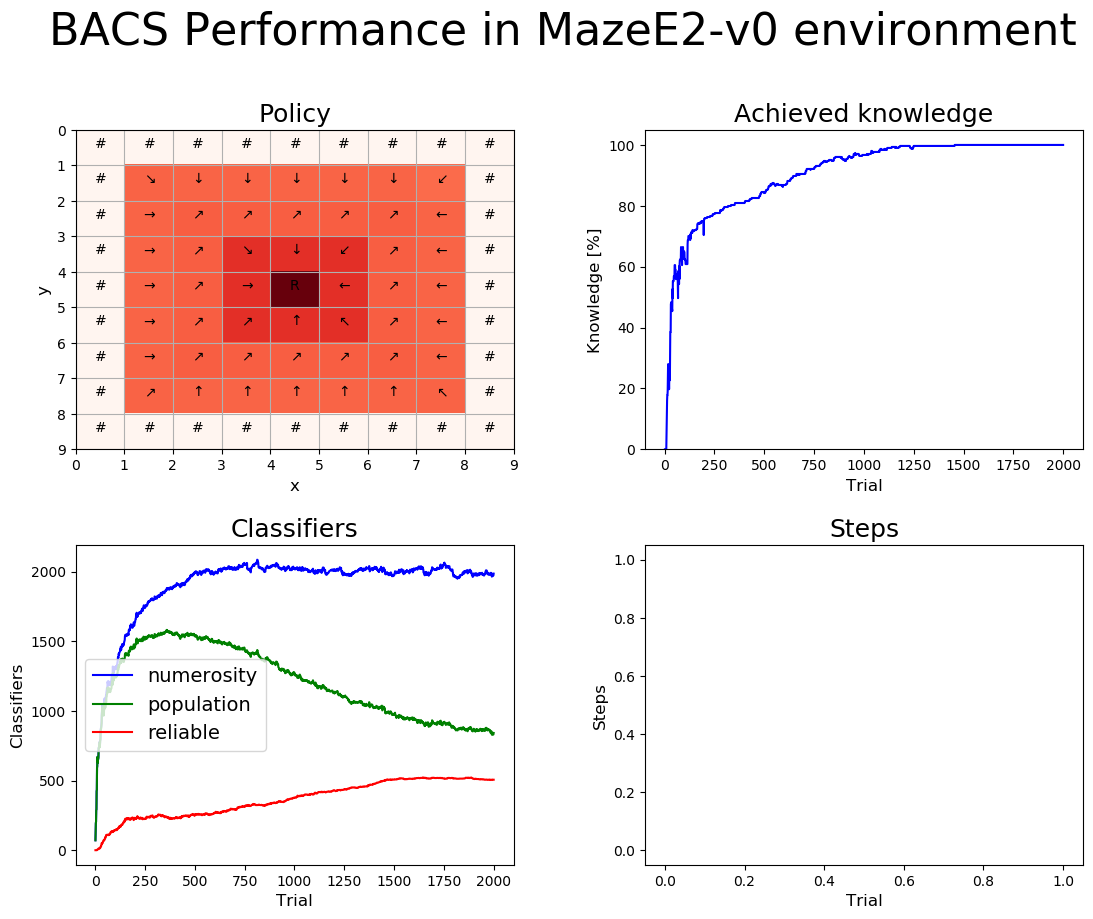

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_performance(agent_explore, maze, metrics_df, cfg_explore, MAZE, metrics_trial_frequency_explore, None)

In [6]:
print(_maze_metrics(population_explore, maze))

avg_step_explore = 0
for trial in metrics_explore:
    avg_step_explore += trial['steps_in_trial']
avg_step_explore /= NUMBER_OF_EXPLORE_TRIALS / metrics_trial_frequency_explore
print("Average number of steps to solve the maze is ",avg_step_explore,
      " for a total of ", NUMBER_OF_EXPLORE_TRIALS, " trials in EXPLORATION")

print("There are ", _does_pees_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.")

{'knowledge': 100.0, 'population': 842, 'numerosity': 1986, 'reliable': 506}
Average number of steps to solve the maze is  25.137  for a total of  2000  trials in EXPLORATION
There are  4  enhanced classifer(s) that match a non-aliased states.


In [7]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore if cl.is_enhanced()]
for cl in population_explore_to_display:
    print(cl)
    print("\n")

00000000 1 None {0:95%, 1:3%, 9:2%}{0:94%, 1:4%, 9:2%}{9:49%, 0:49%, 1:3%}{0:96%, 9:2%, 1:2%}###{0:95%, 1:4%, 9:2%} (empty)               
q: 1.0   r: 794.5  ir: 0.0    f: 794.5  exp: 2722 tga: 50272 talp: 50273 tav: 16.0   num: 10 ee: False


00000000 2 None #{0:90%, 9:8%, 1:2%}{0:62%, 9:33%, 1:5%}{0:92%, 9:5%, 1:3%}#### (empty)               
q: 1.0   r: 793.9  ir: 0.0    f: 793.9  exp: 2326 tga: 50237 talp: 50238 tav: 26.4   num: 14 ee: False


00000000 5 None ###{0:97%, 1:2%, 9:1%}{0:76%, 9:22%, 1:2%}{0:96%, 1:2%, 9:2%}{0:97%, 1:3%, 9:0%}{0:97%, 1:3%, 9:1%} (empty)               
q: 1.0   r: 792.4  ir: 0.0    f: 792.4  exp: 1645 tga: 50231 talp: 50270 tav: 21.7   num: 12 ee: False


00000000 7 None {9:48%, 0:48%, 1:3%}{0:95%, 1:4%, 9:0%}###{0:95%, 1:4%, 9:1%}{0:88%, 9:8%, 1:4%}{0:86%, 1:8%, 9:6%} (empty)               
q: 1.0   r: 792.4  ir: 0.0    f: 792.4  exp: 2223 tga: 50266 talp: 50267 tav: 13.6   num: 15 ee: False


00000000 0 None {9:48%, 0:47%, 1:5%}{0:80%, 9:16%, 1:4%}####